**A unit test for the simulator**

In [1]:
import Simulator
import tensorflow as tf
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Disable all GPUs
try:
    tf.config.set_visible_devices([], 'GPU')
    visible_devices = tf.config.get_visible_devices()
    for device in visible_devices:
        assert device.device_type != 'GPU'
except:
    pass

# Set the number of threads
intra = 2  # threads used within an individual op for parallelism
inter = 2  # threads used for parallelism between independent operations
tf.config.threading.set_intra_op_parallelism_threads(intra)
tf.config.threading.set_inter_op_parallelism_threads(inter)

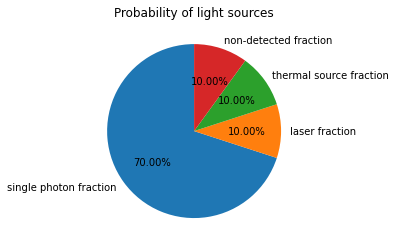

In [5]:
# test the simulator and piechart
s = Simulator.simulator(gt=0.5, Nbins=200, width=1, Ndet=1e5, sps=0.7, laser=0.1, non=0.1, ther=0.1)

# get a pie chart for light sources
s.piechart()

In [7]:
# test the distribution function
distribution = s.distribution()

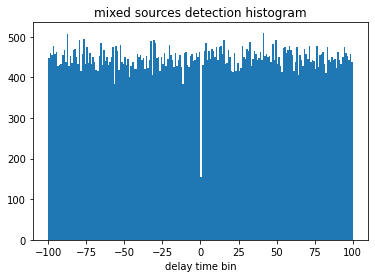

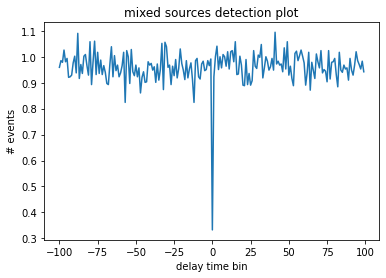

In [9]:
# test the get_data function and saved data files
data,result = s.get_data(dist=distribution, plot=True, save=True, name='test')

Check the `test.txt` file in the `data` folder, the simulator seems to work.

In [13]:
# check the result
print('it is a single photon source:' ,bool(result))

it is a single photon source: True


In [14]:
s.info

{'single photon fraction': 0.7000000000000001,
 'laser fraction': 0.10000000000000002,
 'thermal source fraction': 0.10000000000000002,
 'non-detected fraction': 0.10000000000000002,
 'number of bins': 200,
 'bin width (ns)': 1,
 'average detection events per bin': 500.0}